In [1]:
from yty_manim.application.page_replacement import *
from yty_manim.basic_unit.squ_tex import *
from yty_manim.basic_unit.screen_cycle import *
from manim import *

Manim Community v0.18.0

In [2]:
%%manim -qh -v WARNING PageTest
class PageTest(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        p = FifoPageReplacement(input_lst,page_frame_num=3)
        self.add(p)
        self.wait()
        for i in range(len(input_lst)-1):
            step_on(self,p,i,0.5)

In [1]:
%%manim -qh -v WARNING PageInit
class PageInit(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        p = Page(input_lst,page_frame_num=3)
        p.missing_tracker.set_value(11)
        self.add(p)

UsageError: Cell magic `%%manim` not found.


In [2]:
%%manim -qh -v WARNING Test
class Test(Scene):
    def construct(self):
        a = SquTexSlide("123456")
        b = SquTexSlide("a")
        self.add(a)
        self.wait()
        self.play(*a.pop(2))
        self.wait()
        self.play(*a.push(3,b))

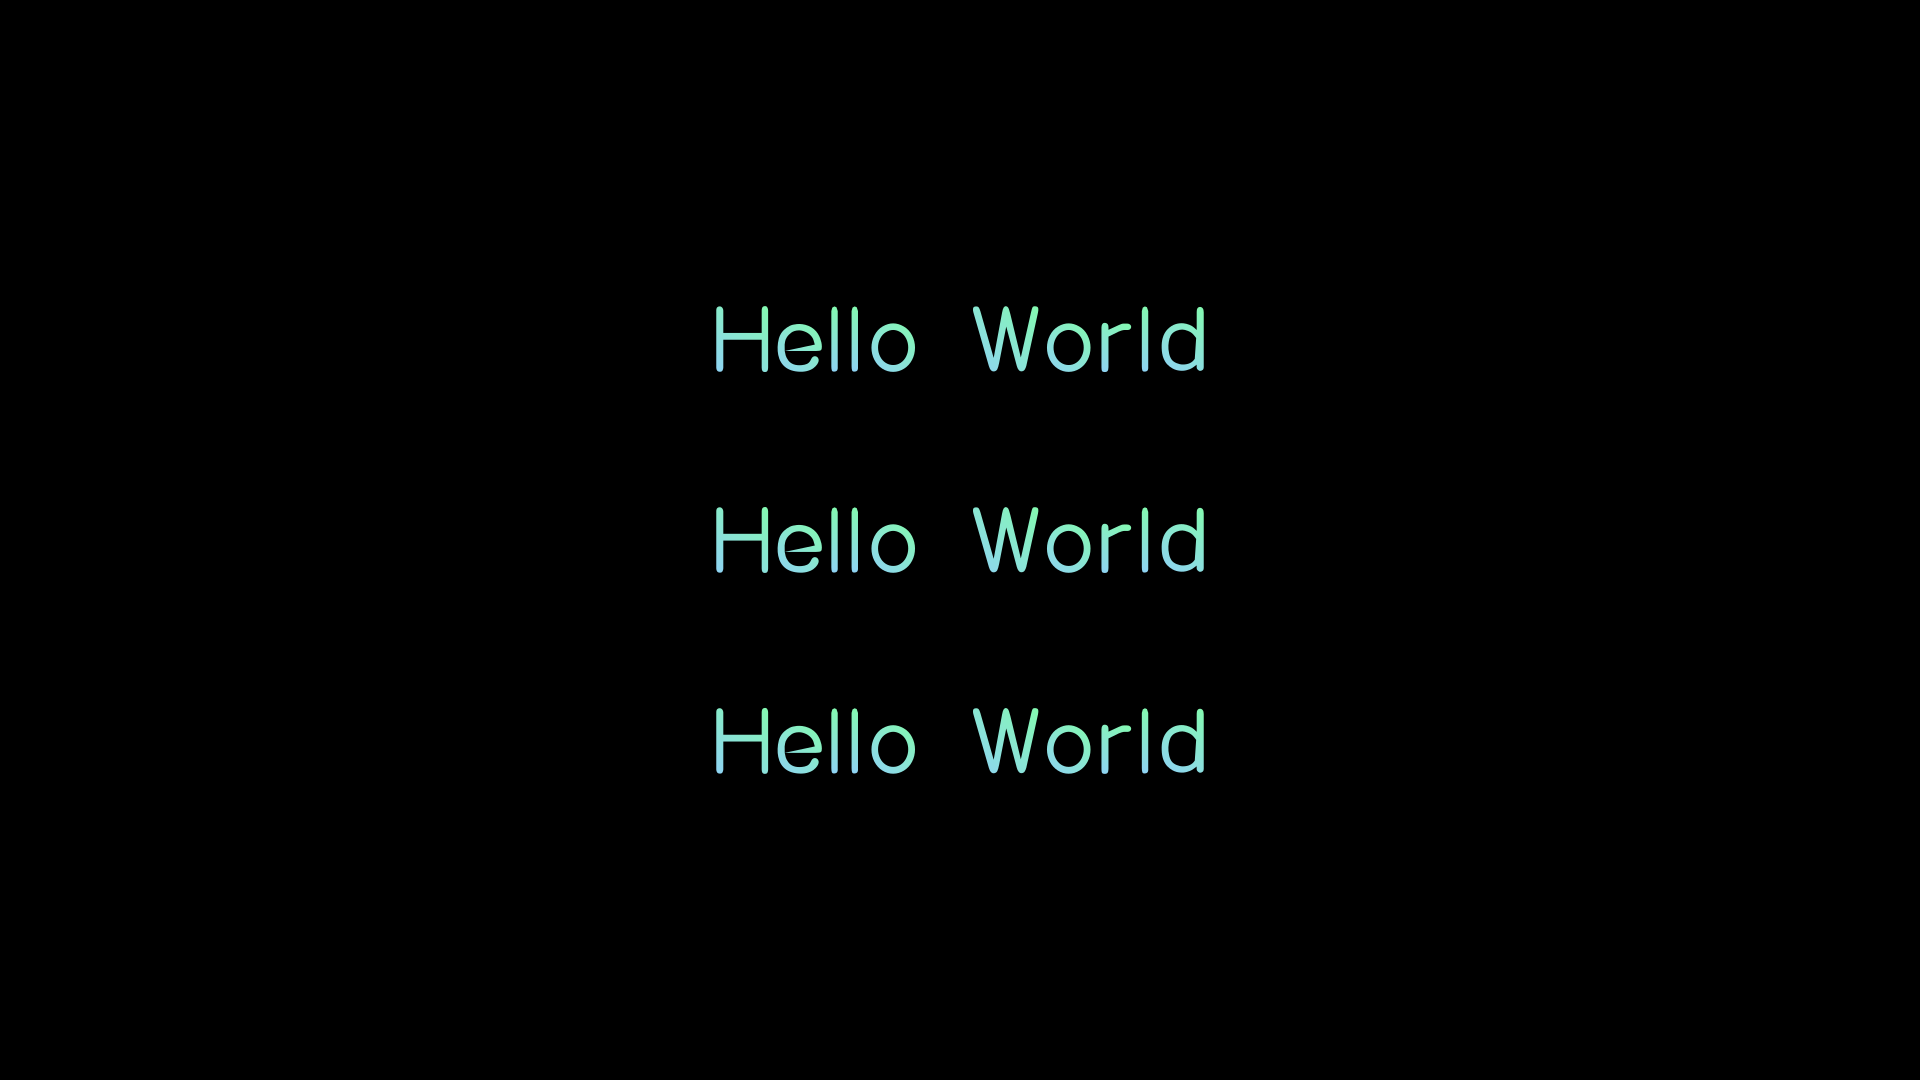

In [2]:
%%manim -qh -v WARNING ScreenTest
class ScreenTest(Scene):
    def construct(self):
        text_list = [
            "Hello World",
            "Hello World",
            "Hello World",
        ]
        s = ScreenCycle(text_list)
        self.add(s)